In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [207]:
orderlines_cl = pd.read_csv('D:\Bootcamp Data Science\Bootcamp\Projects\Code\orderlines_cl.csv')
orders_cl = pd.read_csv('orders_cl.csv')
brands_cl = pd.read_csv('brands.csv')
products_cl = pd.read_csv('products_cl.csv')
orders_cl['created_date'] = pd.to_datetime(orders_cl['created_date'])

In [249]:
#orderlines_cl.drop_duplicates('sku', inplace = True)
orderlines_cl.id_order.nunique()

204855

In [255]:
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                293983 non-null  int64  
 1   id_order          293983 non-null  int64  
 2   product_id        293983 non-null  int64  
 3   product_quantity  293983 non-null  int64  
 4   sku               293983 non-null  object 
 5   unit_price        293983 non-null  float64
 6   date              293983 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 15.7+ MB


In [256]:
new_price_df = products_cl.merge(orderlines_cl, how='left', on = 'sku')
new_price_df_clean = new_price_df.assign(discount = lambda x: ((x['price_new'] - x['unit_price'])))
#new_price_df_clean.plot.scatter(x="price_new", y="unit_price")
#new_price_df_clean = new_price_df.drop_duplicates('sku', inplace = True)

new_price_df_clean = new_price_df_clean.drop_duplicates('sku')
new_price_df_clean

,sku,name,desc,in_stock,type,price_new,promo_price_new,id,id_order,product_id,product_quantity,unit_price,date,discount
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,1,8696,59.99,49.99,1121326.00,300551.00,0.00,1.00,54.99,2017-01-02 13:34:30,5.00
109,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,0,13855401,59.00,59.00,1119255.00,299610.00,0.00,1.00,55.99,2017-01-01 10:52:42,3.01
514,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,0,1387,59.00,56.99,1121454.00,300597.00,0.00,1.00,59.00,2017-01-02 14:29:35,0.00
576,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,0,1230,25.00,23.00,1120495.00,300229.00,0.00,2.00,25.00,2017-01-02 02:32:00,0.00
599,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,1,1364,34.99,3.20,1154897.00,313091.00,0.00,1.00,34.99,2017-01-22 03:23:13,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295380,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,1,12282,29.99,26.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295381,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,1,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295382,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,1,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295383,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,0,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
def clean_price(row):
    if row['discount'] > 3000:
        price_2 = str(row['price_new']).replace('.','')
        integer, deci = str(row['unit_price']).split('.')
        price_2int = price_2[:len(integer)]
        price_2dec = price_2[len(integer):]
        price_new1 = price_2int + '.' + price_2dec
        return price_new1

In [258]:
price_new1 = new_price_df_clean.apply(clean_price, axis=1)
new_price_df_clean['price_new1'] = price_new1

In [259]:
new_price_df_clean['price_new1'] = new_price_df_clean['price_new1'].fillna(new_price_df_clean['price_new'])

In [260]:
new_price_df_clean['price_new1'] = new_price_df_clean['price_new1'].astype(float)

In [261]:

new_price_df_clean.loc[new_price_df_clean['discount'] > 500, ['price_new', 'unit_price', 'price_new1']]
new_price_df_clean['disc'] = new_price_df_clean.price_new1 - new_price_df_clean.unit_price
new_price_df_clean.discount.describe()



count     7850.00
mean       436.08
std       3503.57
min      -5550.00
25%          4.14
50%         15.00
75%         70.85
max     114742.76
Name: discount, dtype: float64

In [262]:
new_price_df_clean.loc[new_price_df_clean['disc'] < -1000, 'price_new1'] = new_price_df_clean.price_new
new_price_df_clean.loc[((new_price_df_clean['disc'] < -500) & (new_price_df_clean['disc'] > -1000)), 'price_new1'] = new_price_df_clean.price_new
new_price_df_clean['disc'] = new_price_df_clean.price_new1 - new_price_df_clean.unit_price
new_price_df_clean.describe()

new_price_df_clean.loc[new_price_df_clean['price_new'] == 10529.70, 'price_new1'] = 1052.97
new_price_df_clean.loc[new_price_df_clean['price_new'] == 10768.69, 'price_new1'] = 1076.87
new_price_df_clean['disc'] = new_price_df_clean.price_new1 - new_price_df_clean.unit_price
new_price_df_clean

,sku,name,desc,in_stock,type,price_new,promo_price_new,id,id_order,product_id,product_quantity,unit_price,date,discount,price_new1,disc
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,1,8696,59.99,49.99,1121326.00,300551.00,0.00,1.00,54.99,2017-01-02 13:34:30,5.00,59.99,5.00
109,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,0,13855401,59.00,59.00,1119255.00,299610.00,0.00,1.00,55.99,2017-01-01 10:52:42,3.01,59.00,3.01
514,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,0,1387,59.00,56.99,1121454.00,300597.00,0.00,1.00,59.00,2017-01-02 14:29:35,0.00,59.00,0.00
576,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,0,1230,25.00,23.00,1120495.00,300229.00,0.00,2.00,25.00,2017-01-02 02:32:00,0.00,25.00,0.00
599,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,1,1364,34.99,3.20,1154897.00,313091.00,0.00,1.00,34.99,2017-01-22 03:23:13,0.00,34.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295380,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,1,12282,29.99,26.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN
295381,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,1,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.95,NaN
295382,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,1,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.95,NaN
295383,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,0,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.95,NaN


In [263]:
#new_price_df_clean.loc[]

In [264]:
#
#new_price_df_clean.drop(['index'], axis=1, inplace=True)
new_price_df_clean.reset_index(inplace = True)

#new_price_df_clean.loc[new_price_df_clean.disc < -1000]


#new_price_df_clean

In [265]:
new_price_df_clean.drop(['index'], axis=1, inplace=True)

In [266]:
#new_price_df_clean.dropna(inplace=True)


In [267]:
new_price_df_clean.loc[new_price_df_clean.disc < -1000]

,sku,name,desc,in_stock,type,price_new,promo_price_new,id,id_order,product_id,product_quantity,unit_price,date,discount,price_new1,disc
6030,LAC0223,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,0,11935397,9799.00,7899.99,1200059.00,332976.00,0.00,6.00,15349.00,2017-03-07 15:51:14,-5550.00,9799.00,-5550.00
6033,LAC0218,6big LaCie Hard Drive 48TB RAID Thunderbolt 3 ...,48TB hard drive bays with RAID 6 5 two ports T...,0,11935397,4099.00,3249.99,1232317.00,348254.00,0.00,1.00,5399.00,2017-04-21 11:24:09,-1300.00,4099.00,-1300.00
6034,LAC0219,LaCie Hard Disk 6big 60TB RAID Thunderbolt 3 U...,60TB hard drive bays with RAID 6 5 two ports T...,0,11935397,4849.00,400.00,1226269.00,345307.00,0.00,2.00,7349.00,2017-04-11 10:28:02,-2500.00,4849.00,-2500.00
6701,GTE0098,G-Technology G-SPEED Shuttle XL 48TB RAID Thun...,External Storage 48TB (6x8TB) with 2 serial ad...,0,11935397,4697.99,3829.99,1205993.00,335642.00,0.00,1.00,5999.99,2017-03-16 01:57:35,-1302.00,4697.99,-1302.00


In [268]:
#new_price_df_clean.drop(new_price_df_clean.index[[6030,6033,6034,6701]], inplace=True)
#new_price_df_clean.drop(['discount','promo_price_new','price_new'], axis=1, inplace=True)
new_price_df_clean


,sku,name,desc,in_stock,type,price_new,promo_price_new,id,id_order,product_id,product_quantity,unit_price,date,discount,price_new1,disc
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,1,8696,59.99,49.99,1121326.00,300551.00,0.00,1.00,54.99,2017-01-02 13:34:30,5.00,59.99,5.00
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,0,13855401,59.00,59.00,1119255.00,299610.00,0.00,1.00,55.99,2017-01-01 10:52:42,3.01,59.00,3.01
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,0,1387,59.00,56.99,1121454.00,300597.00,0.00,1.00,59.00,2017-01-02 14:29:35,0.00,59.00,0.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,0,1230,25.00,23.00,1120495.00,300229.00,0.00,2.00,25.00,2017-01-02 02:32:00,0.00,25.00,0.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,1,1364,34.99,3.20,1154897.00,313091.00,0.00,1.00,34.99,2017-01-22 03:23:13,0.00,34.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,1,12282,29.99,26.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN
10575,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,1,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.95,NaN
10576,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,1,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.95,NaN
10577,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,0,1392,69.95,64.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.95,NaN


In [269]:
remove = new_price_df_clean[ new_price_df_clean.price_new1> 15339]

In [270]:
new_price_df_clean= new_price_df_clean.drop(remove.index, axis=0)

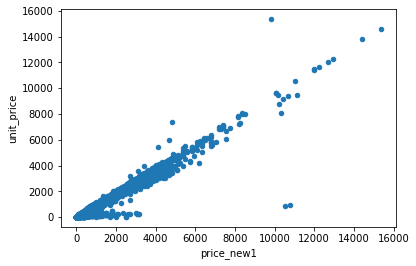

In [287]:
p = new_price_df_clean.plot.scatter( x ='price_new1', y= 'unit_price')

In [253]:
products_final = new_price_df_clean.drop(columns = ['id_order', 'id', 'product_id','product_quantity', 'unit_price','date', 'disc'])
products_final.info()


In [251]:
products_final.to_csv('D:\Bootcamp Data Science\Bootcamp\Projects\Code\products_final.csv', index=False)

In [271]:
new_price_df_clean = (
new_price_df_clean 
    # create year and month
    .assign(year = orders_cl['created_date'].dt.strftime('%Y'), 
           month = orders_cl['created_date'].dt.strftime('%m'))
)
a_df_cl=(
new_price_df_clean 
    .filter(['sku','price_new1','month','year', 'unit_price',])
    .groupby(['year','month'])
    .agg({'unit_price' : ['mean'], 'price_new1' : ['mean']})
    .sort_values('month', ascending = True)
    .reset_index()
)



In [272]:
a_df_cl

,year,month,unit_price,price_new1
,,,mean,mean
0,2017,01,550.69,760.74
1,2018,01,57.99,307.16
2,2017,02,101.02,182.87
3,2018,02,40.77,45.16
4,2017,03,307.27,481.16
5,2018,03,151.99,135.75
6,2017,04,133.52,382.61
7,2017,05,101.79,101.83
8,2017,06,53.96,347.75


In [274]:
new_price_df  =(
a_df_cl
    
    .assign(percent = lambda x: (((x['price_new1'] - x['unit_price'])/x['price_new1'] * 100)))
    .assign(discount = lambda x: (x['price_new1'] - x['unit_price']))
)
new_price_df

,year,month,unit_price,price_new1,percent,discount
,,,mean,mean,,
0,2017,01,550.69,760.74,27.61,210.05
1,2018,01,57.99,307.16,81.12,249.17
2,2017,02,101.02,182.87,44.76,81.84
3,2018,02,40.77,45.16,9.73,4.39
4,2017,03,307.27,481.16,36.14,173.88
5,2018,03,151.99,135.75,-11.97,-16.25
6,2017,04,133.52,382.61,65.10,249.09
7,2017,05,101.79,101.83,0.04,0.04
8,2017,06,53.96,347.75,84.48,293.79


In [275]:
new_price_df.columns =['year', 'month','price_new1','unit_price','percent','discount']

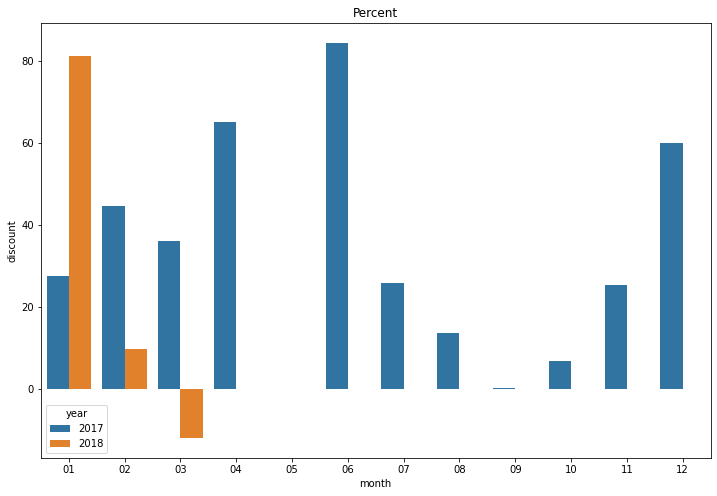

In [276]:
plt.subplots(figsize=(12, 8))



    # plot_date help us to plot datetime plots, as it can understand datetime formats like periods
sns.barplot(data=new_price_df, x='month', y='percent', hue ='year')

plt.xlabel('month') # x label name
plt.ylabel('discount') # y label name

plt.title('Percent') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() #

In [277]:
a_df_cl=(
new_price_df_clean
    .filter(['sku','price_new1','month','year', 'unit_price'])
    .groupby(['year','month','sku'])
    .agg({'unit_price' : ['mean'], 'price_new1' : ['mean']})
    .sort_values('month', ascending = True)
    .reset_index()
)

a_df_cl

,year,month,sku,unit_price,price_new1
,,,,mean,mean
0,2017,01,8MO0001-A,12.96,35.00
1,2017,01,PAC1571,1887.99,2249.00
2,2017,01,PAC1572,2029.99,2489.00
3,2017,01,PAC1573,2304.99,3209.00
4,2017,01,PAC1574,1857.99,2209.00
...,...,...,...,...,...
10529,2017,12,APP0025,59.00,59.00
10530,2017,12,MOP0013,NaN,69.95
10531,2017,12,MAK0009,79.99,79.99


In [279]:
discount_absolute =(
a_df_cl
    .assign(discounts = lambda x: ((x['price_new1'] - x['unit_price'])))
    .sort_values('discounts', ascending = False)  
)   
discount_absolute.dropna(inplace=True)
discount_absolute

,year,month,sku,unit_price,price_new1,discounts
,,,,mean,mean,
156,2017,01,PAC1523,962.99,10768.69,9805.70
113,2017,01,PAC1480,892.99,10529.70,9636.71
1006,2017,01,PAC1904,255.99,3173.59,2917.60
1011,2017,01,PAC1901,255.82,3116.28,2860.46
22,2017,01,PAC1552,232.99,3043.59,2810.60
...,...,...,...,...,...,...
8873,2017,01,LAC0217,3959.10,3399.00,-560.10
8874,2017,01,LAC0218,5399.00,4099.00,-1300.00
9835,2017,01,GTE0098,5999.99,4697.99,-1302.00
